In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import sklearn 

In [3]:
train=pd.read_csv('D:\\DDDrilll\\ds3-spring-2018\\kaggle\\train.csv')
test=pd.read_csv('D:\\DDDrilll\\ds3-spring-2018\\kaggle\\test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


рассмотрим в процентном соотношении столбцы train.csv сместо CryoSleep можно вписывать любые другие

In [5]:
train.Destination.value_counts(normalize=True)

TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: Destination, dtype: float64

### Разделим на датафрейм train на X и Y значения
y_train - выжил наш пассажир или нет

x_train - свойства, которые влияют на то жив или нет

#### Для Y значения 
Возьмем из train столбец "Transported" и переведем в значения "1" и "0"

In [6]:
y_train=train['Transported']
y_train=y_train.replace({True: 1, False:0})
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [7]:
x_train=train.drop(['Transported'], axis=1)
# нет необходимости писать Inplace= true и так все сделает
# axis - удаляем столбец из фрейма; inplace - говорит, что мы подтверждаем изменения в фрейме
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


#### Предположение первое
Предположим, если о статусе VIP не известно, то он его и не имел. Логично предположить, что люди, которые
больше заплатили за билет,  будут в приоритете у компании перевозке. Тоже переведем его в "1" и "0" 

In [8]:
x_train['VIP']=x_train.VIP.replace({ True: 1, False:0})
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [9]:
x_train['VIP']=x_train['VIP'].fillna(0)

#### Предположение второе
посчитамем общее колво потраченных денег пассажиром

In [10]:
x_train['Summary']=x_train[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
x_train=x_train.drop(columns=['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck'])
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Summary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1091.0


 
Можно было предположить, что на каждые из 5 услуг неопределенные значения заменить на средние.
Но это могло привести к тому, что при сложении, общая трата пассажира может необъективно увеличиться.

Схуяли?

Это мы проверим, но позже.

Так как, сейчас особо нет дела до имен. Хотя можно выяснить по именам пол пассажира

In [11]:
x_train=x_train.drop(columns=['Name'])

#### Предположение третье 
Заполним столбец с возрастом. Неопределенный значения мы заменим средний возраст по столбцу
и попробуем сделать разбивку по возрастной категории на "дети", "взрослые", "старики"

Дети - до 18 лет

Взрослые- с 18 до 60 лет

Старики- Старше 60 лет



In [12]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0


In [13]:
x_train['Age']=x_train['Age'].fillna(x_train['Age'].mean())

создадим пустые столбцы с неопределенными значениями

In [14]:
x_train['Child']=np.nan
x_train['Adults']=np.nan
x_train['Elder']=np.nan
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,NaN,NaN,NaN
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,NaN,NaN,NaN
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,NaN,NaN,NaN
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,NaN,NaN,NaN
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,NaN,NaN,NaN


Напишем функцию, которая определит кто есть кто

### Для тебя 
в "age_class(x)"  x- это аргумент которым мы будем пользоваться в структуре функции  
"return" возвращает значение нашей функции после преобразований внутри

"apply" работает очень просто  
В нее мы передаем нашу функцию и привязываем к столбцу


In [15]:
def class_child (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if x<18:
        return 1
    else:
        return 0

def class_adults (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if 18<=x<=60:
        return 1
    else:
        return 0

def class_elder (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if x>60:
        return 1
    else:
        return 0


In [16]:
# apply применяет написанную или существующую функцию к dataframe
x_train['Child']=x_train['Age'].apply(class_child)
x_train['Adults']=x_train['Age'].apply(class_adults)
x_train['Elder']=x_train['Age'].apply(class_elder)
#x_train=x_train.drop(columns=['Age'])
x_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,0,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,1,0,0


### Предположение 4  
Разберемся с криосном. Они не двигаються когда спят следовательно шансы спастись меньше

In [17]:
x_train['CryoSleep']=x_train.CryoSleep.replace({ True: 1, False:0})
x_train['CryoSleep']=x_train['CryoSleep'].fillna(0)
x_train.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0,1,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,0,1,0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,0,1,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,0,1,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,1,0,0
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.0,0.0,774.0,0,1,0
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.0,0.0,1584.0,0,1,0
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0,1,0
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.0,0.0,1018.0,0,1,0
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.0,0.0,0.0,1,0,0


## Мне пришла гениальная идея разобрать столбец с информацией о номере пассажира

Вычленим первые и последние буквы из номеров кабин. Также внесем и информацию а цифре   
Предположение такое, если мы разберемся с тем какая из частей сильней подверглась переносу, то можно эту информацию можно будет использовать в дальнейшем  
Начнем с первой буквы

In [18]:
import re

'''Создаем список для дальнейшей обработки нашего столбца Cabin'''

cabin_q=x_train['Cabin'].to_list()

'''Далее нам понадобиться пустой список, чтоб вносить туда значения '''
first_litter=[] 

for i in cabin_q:
    '''Патерн который ищет первые буквы номера кабины и добавляет его в пустой список'''
    litter_0=re.findall('^.',str(i))
    first_litter.extend(litter_0)  # extend имнно расширяет список а не прибавляет элемент

Создадим список уникальных значений а также посчитаем их колличество

In [19]:
uniq_1=[]

for i in first_litter:
    
    if i not in uniq_1:
        uniq_1.extend(i)
    else:
        continue

'''Сразу отсортируем список чтобы легче было работать'''
uniq_1=sorted(uniq_1, reverse=False)
print(uniq_1)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n']


Посчитаем колличество вхождений каждой из букв

In [20]:
quantity_1=[]
for i in uniq_1:
    c=0
    for j in first_litter:
        if i==j:
            c+=1
        else:
            continue
    quantity_1.append(c) # append ичпользкеться с числами а extend лучше со строками
print(quantity_1)

[256, 779, 747, 478, 876, 2794, 2559, 5, 199]


Построим график распредеения 

Text(0, 0.5, 'Quantity')

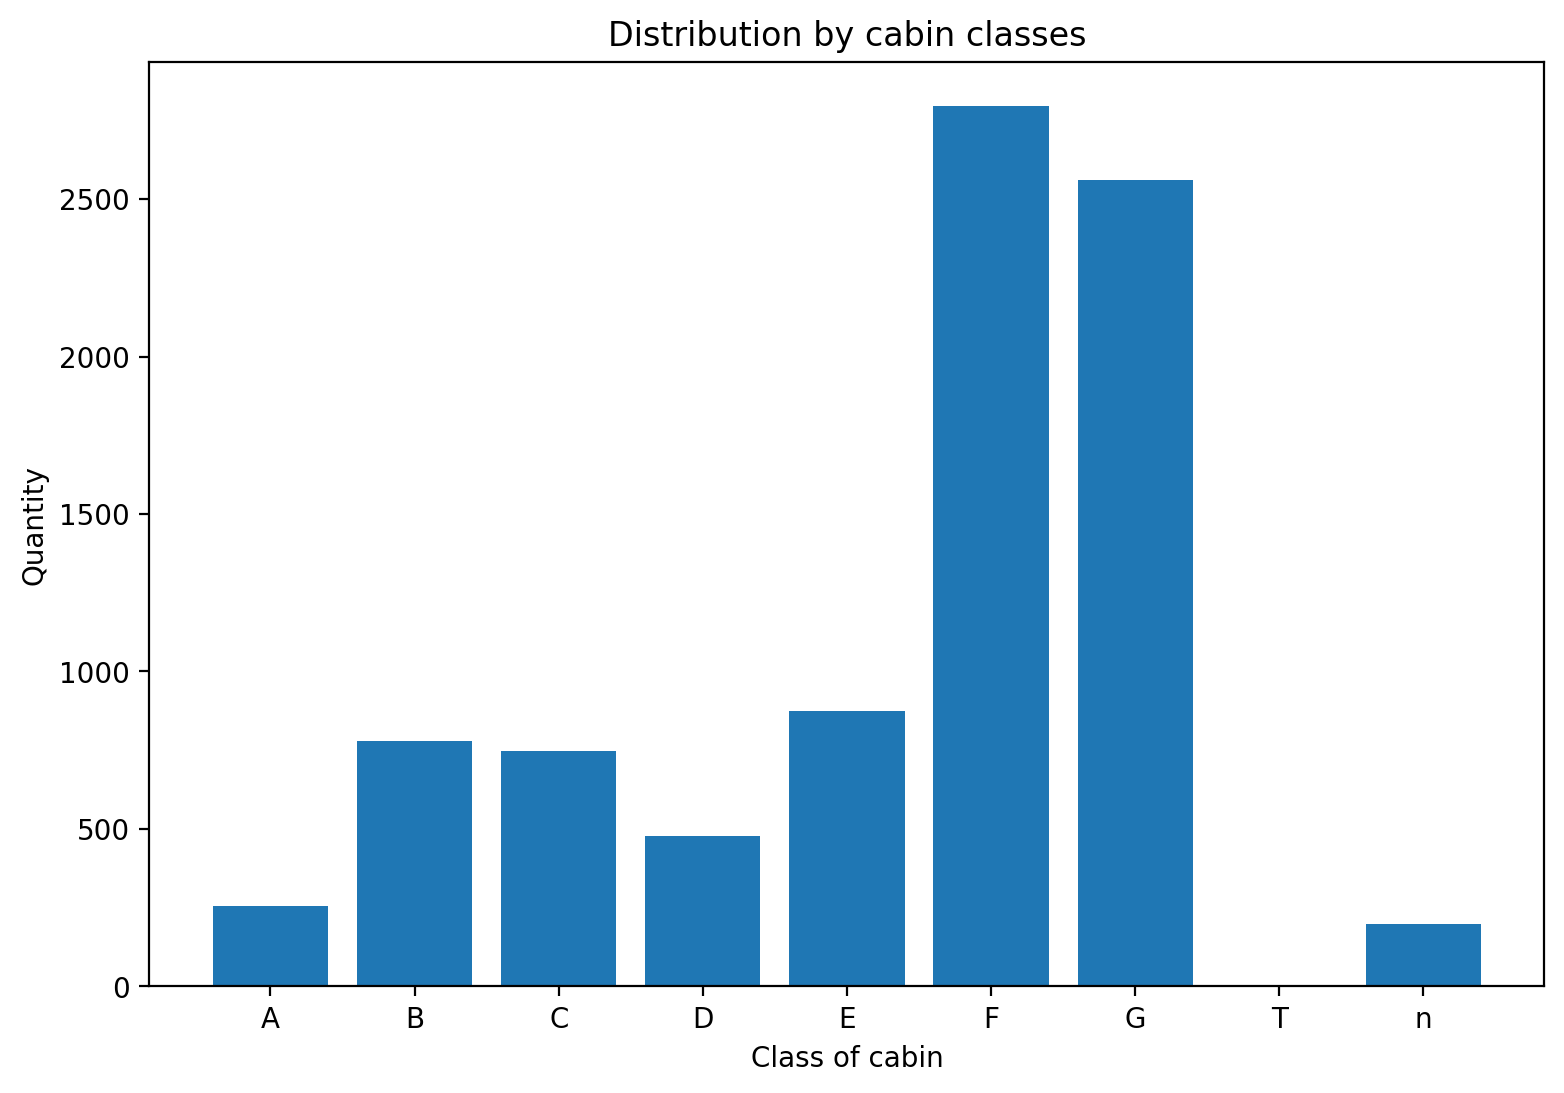

In [21]:
plt.bar(uniq_1,quantity_1)
plt.title('Distribution by cabin classes')
plt.xlabel('Class of cabin')
plt.ylabel('Quantity')


Видно , что больше всего сосредоточено на палубе 'F' и 'G' а на остальных меньше  
Также вычленим и прербразуем последнее значение ноиере кабины. Оно отвечает за то на какой стороне корабля нахдиться комната

In [22]:
import re

'''Далее нам понадобиться пустой список, чтоб вносить туда значения '''
last_litter=[] 

for i in cabin_q:
    '''Патерн который ищет последние буквы номера кабины и добавляет его в пустой список'''
    litter_1=re.findall('.$',str(i))
    last_litter.extend(litter_1)  # extend имнно расширяет список а не прибавляет элемент

Отработаем с числами в номере. Выделим цифры и также посчитаем вхождение каждой из них. Построим график

In [23]:
import re

'''Далее нам понадобиться пустой список, чтоб вносить туда значения '''
room_number=[] 

for i in cabin_q:
    '''Патерн который ищет цифры в номере кабины и добавляет его в пустой список'''
    num=re.findall('(\d+)|(\w\w\w)',str(i)) # также учитываем NaN или список сдвинеться 
    room_number.extend(num)  # extend имнно расширяет список а не прибавляет элемент


In [24]:
uniq_n=[]

for i in range (0,len(room_number)):
    for j in range (0,1):
    
        if room_number[i][j]=='':
            uniq_n.append(room_number[i][j])
        elif room_number[i][j]=='nan':
            uniq_n.append(room_number[i][j])

'''Сразу отсортируем список чтобы легче было работать'''
uniq_n=sorted(uniq_n, reverse=False)
print(uniq_n)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [25]:
from collections import Counter
value_counts=Counter(room_number)
print(value_counts.most_common(10))

[(('', 'nan'), 199), (('82', ''), 28), (('19', ''), 22), (('86', ''), 22), (('56', ''), 21), (('97', ''), 21), (('176', ''), 21), (('230', ''), 20), (('65', ''), 19), (('109', ''), 19)]


Если посмотреть ена вывод "Counter" то можно увидеть , что максимальное значение это неопределенное.  
Численные значения не превосходят 30. Может и есть зависимость- с подъемом изменяються и числа, но пока без этого

Преобразуем наши данный в DataFrame для дальнейшего анализа

In [26]:
cabin_class=pd.DataFrame(data={
        'First litter': first_litter,
        'Last litter': last_litter,
        'Cryosleep': x_train['CryoSleep'],
        'Vip' : x_train['VIP'],
        'Home planet': x_train['HomePlanet'],
        'Adults': x_train['Adults'],
        'Elder': x_train['Elder'],
        'Child': x_train['Child']
    }
    )

Так как я сразу не обработал неопределенные данные, то сейчас это и сделаем  
Заменим неопределенные значения первой буквы на 'F', как на среднее. Неопределенные значения последней буквы, я удалил, как по мне 2 % не будут сильно влиять на выборку

In [27]:
x_train['HomePlanet'].info()
Counter(x_train['HomePlanet'])

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: HomePlanet
Non-Null Count  Dtype 
--------------  ----- 
8492 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


Counter({'Europa': 2131, 'Earth': 4602, 'Mars': 1759, nan: 201})

Логично также прибавить неопределенные значения к самой встречающейся планете

In [28]:
cabin_class=pd.get_dummies(cabin_class,columns=['First litter', 'Last litter','Home planet'])

cabin_class.loc[cabin_class['First litter_n']==1,'First litter_F']=1
cabin_class=cabin_class.drop(columns=['First litter_n'])

# Может потом получиться отработать с неопределенными значениями борта 
cabin_class=cabin_class.drop(columns=['Last litter_n'])

преобразуем в единый формат данных

In [29]:
cabin_class['Cryosleep']=cabin_class['Cryosleep'].astype(np.uint8)
cabin_class['Vip']=cabin_class['Vip'].astype(np.uint8)
cabin_class['Adults']=cabin_class['Adults'].astype(np.uint8)
cabin_class['Child']=cabin_class['Child'].astype(np.uint8)
cabin_class['Elder']=cabin_class['Elder'].astype(np.uint8)
cabin_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Cryosleep           8693 non-null   uint8
 1   Vip                 8693 non-null   uint8
 2   Adults              8693 non-null   uint8
 3   Elder               8693 non-null   uint8
 4   Child               8693 non-null   uint8
 5   First litter_A      8693 non-null   uint8
 6   First litter_B      8693 non-null   uint8
 7   First litter_C      8693 non-null   uint8
 8   First litter_D      8693 non-null   uint8
 9   First litter_E      8693 non-null   uint8
 10  First litter_F      8693 non-null   uint8
 11  First litter_G      8693 non-null   uint8
 12  First litter_T      8693 non-null   uint8
 13  Last litter_P       8693 non-null   uint8
 14  Last litter_S       8693 non-null   uint8
 15  Home planet_Earth   8693 non-null   uint8
 16  Home planet_Europa  8693 non-null   uint8


### Попробуем создать древо решений

Это поможет определить какие из фичей нам наиболее важны для дальнейшей работы с данными. Будем использовать наш "cabin_class" и добавим его в наш о сновной фрейм.


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [31]:
clf.fit(cabin_class, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

создадим список "feature_names" и "class_names" для того чтоб в дальнейшем визуализировать

In [33]:
fn=cabin_class.columns.to_list()


In [34]:
cn=['not transported', 'transported']

Дерево можно отобразить c помощью  онлайн-сервиса http://www.webgraphviz.com

In [35]:
get_tree_dot_view(clf, fn, cn)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Cryosleep <= 0.5\ngini = 0.5\nsamples = 8693\nvalue = [4315, 4378]\nclass = transported", fillcolor="#fcfeff"] ;
1 [label="Child <= 0.5\ngini = 0.446\nsamples = 5656\nvalue = [3761, 1895]\nclass = not transported", fillcolor="#f2c09d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Last litter_S <= 0.5\ngini = 0.427\nsamples = 4844\nvalue = [3347, 1497]\nclass = not transported", fillcolor="#f1b992"] ;
1 -> 2 ;
3 [label="gini = 0.383\nsamples = 2496\nvalue = [1852, 644]\nclass = not transported", fillcolor="#eead7e"] ;
2 -> 3 ;
4 [label="gini = 0.463\nsamples = 2348\nvalue = [1495, 853]\nclass = not transported", fillcolor="#f4c9aa"] ;
2 -> 4 ;
5 [label="Home planet_Earth <= 0.5\ngini = 0.5\nsamples = 812\nvalue = [414, 398]\nclass = not transported", fillcolor="#fefaf7"] ;
1 -> 5 ;
6 [label="gini = 0.466\nsamples = 238\nvalue = [88, 

Каждый узел (прямоугольник) дерева содержит четыре строки:  

Задаваемый вопрос о значении одного из признаков конкретного измерения: от него зависит, в какую сторону мы выйдем из этого узла.  
Gini — мера ошибки в узле. (Оценка Джини - это показатель, который количественно определяет чистоту узла )  
___Чем меньше коэффициент Джини, тем меньше вероятность того, что выбранный образец в наборе будет классифицирован неправильно,  
Samples — количество образцов данных (измерений) в узле.  
Value — оценка цели для всех образцов данных в узле.  
Class- значение показывает прогноз, который сделает данный узел, и его можно определить по

([<matplotlib.axis.YTick at 0x27a23bedd00>,
 [Text(0, 0, 'Cryosleep'),
  Text(0, 1, 'Vip'),
  Text(0, 2, 'Adults'),
  Text(0, 3, 'Elder'),
  Text(0, 4, 'Child'),
  Text(0, 5, 'First litter_A'),
  Text(0, 6, 'First litter_B'),
  Text(0, 7, 'First litter_C'),
  Text(0, 8, 'First litter_D'),
  Text(0, 9, 'First litter_E'),
  Text(0, 10, 'First litter_F'),
  Text(0, 11, 'First litter_G'),
  Text(0, 12, 'First litter_T'),
  Text(0, 13, 'Last litter_P'),
  Text(0, 14, 'Last litter_S'),
  Text(0, 15, 'Home planet_Earth'),
  Text(0, 16, 'Home planet_Europa'),
  Text(0, 17, 'Home planet_Mars')])

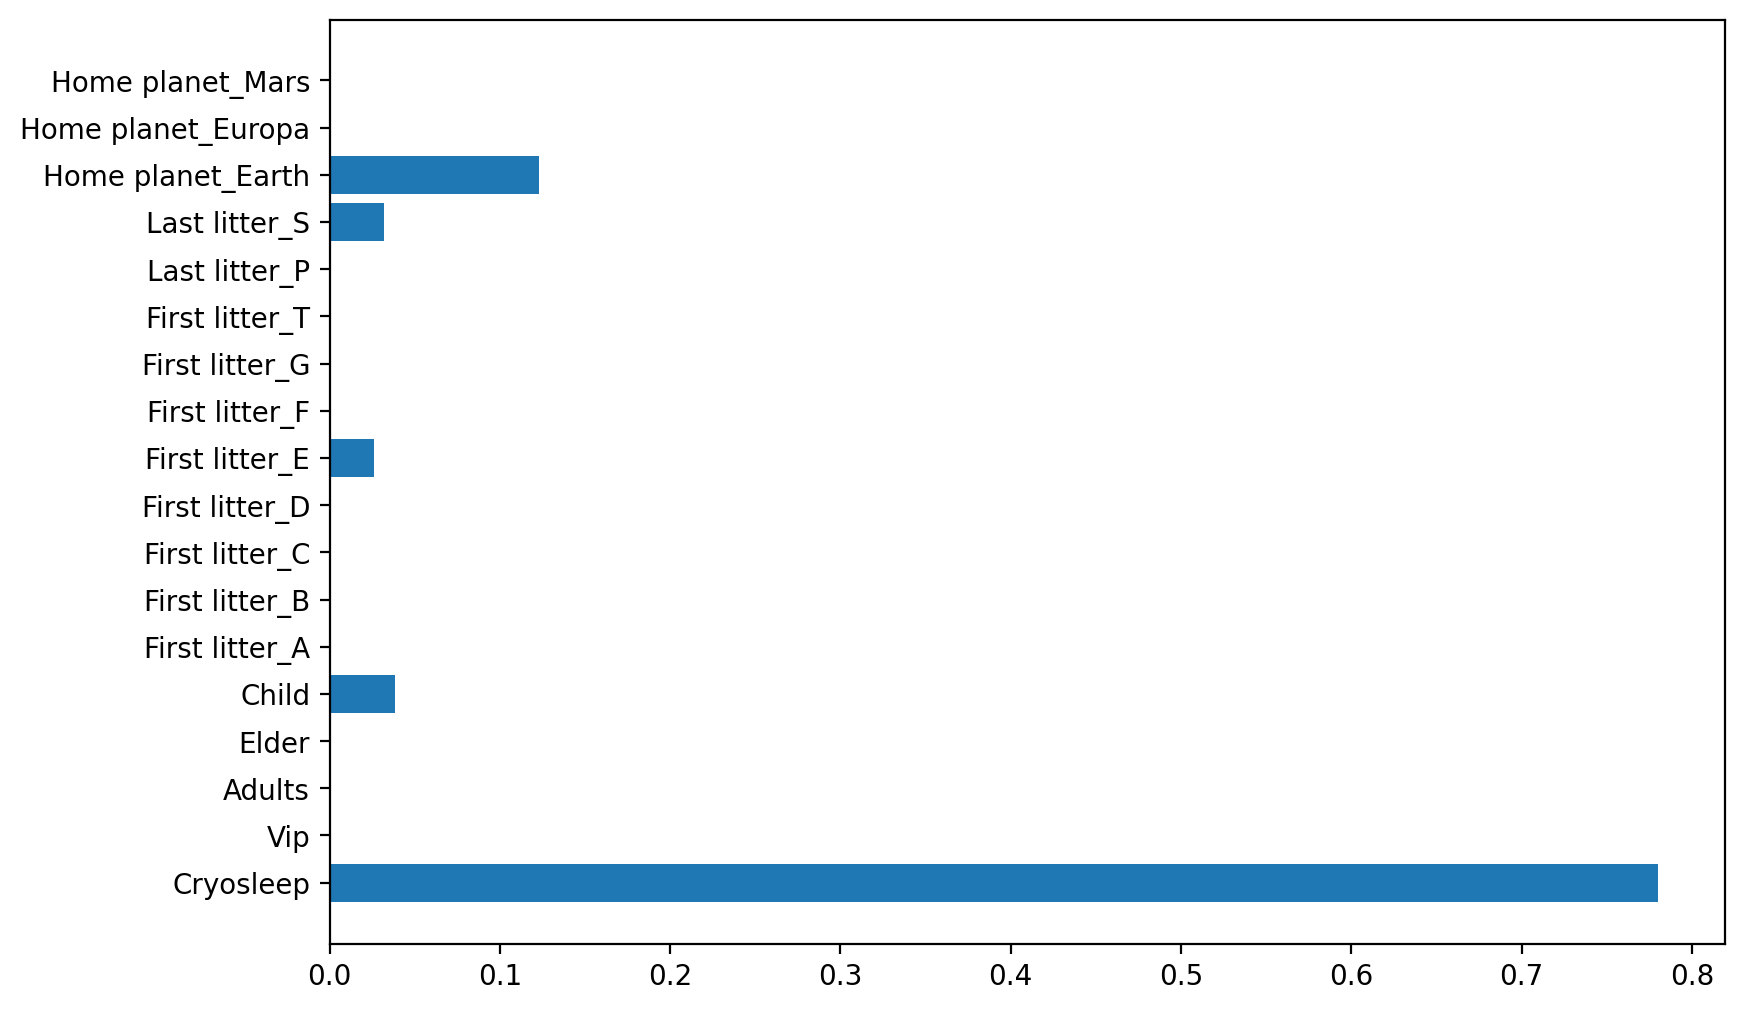

In [36]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(fn)),fn)

Из графика распределения видно, что наиболее влияющие на перенос человека это состояние криосна и планета с которой они вылетели- Земля.  
Также можно учитывать еще и правый борт корабля и палубу E. Ну и дети.  
Тогда преобразуем наш тренировочные данные исходя из этой информации.

In [37]:
x_train['Destination']=x_train['Destination'].fillna('TRAPPIST-1e')
destination=pd.get_dummies(x_train, columns=['Destination'])

In [38]:

x_train=x_train.drop(['Adults','Elder','Age','HomePlanet','Cabin','PassengerId'],axis=1)
x_train['Earth']=cabin_class['Home planet_Earth']
x_train['S']=cabin_class['Last litter_S']
x_train['E']=cabin_class['First litter_E']
x_train['55 Cancri e']=destination['Destination_55 Cancri e']
x_train['TRAPPIST-1e']=destination['Destination_TRAPPIST-1e']
x_train['PSO J318.5-22']=destination['Destination_PSO J318.5-22']
x_train=x_train.drop(['Destination'],axis=1)

---


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [40]:
X_train,X_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=41)

Y- целевая пременная из тренировочной выборки  
X- параметры по которым определяем целевую пременную из тренировочной выборки

1) X_train - сюда входят все ваши независимые переменные, они будут использоваться для обучения модели, также, поскольку мы указали test_size = 0.4,  
это означает, что 60% наблюдений из ваших полных данных будут использоваться для обучения / подгонки модели, а остальные 40% будут использоваться для тестирования модель.

2) X_test - это оставшаяся 40% часть независимых переменных из данных, которые не будут использоваться на этапе обучения и будут использоваться для составления прогнозов для проверки точности модели.

3) y_train - это ваша зависимая переменная, которая должна быть предсказана этой моделью, это включает метки категорий для ваших независимых переменных, нам нужно указать нашу зависимую переменную при обучении / подгонке модели.

4) y_test - эти данные имеют метки категорий для ваших тестовых данных, эти метки будут использоваться для проверки точности между фактическими и прогнозируемыми категориями.

In [50]:
dtc=DecisionTreeClassifier(max_depth=5,random_state=10)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("DecisionTreeClassifire Balanced accuracy: {}".format(metrics.balanced_accuracy_score(y_test,dtc_pred)))
print("DecisionTreeClassifire F1: {}".format(metrics.f1_score(y_test,dtc_pred)))
print("DecisionTreeClassifire Recall: {}".format(metrics.recall_score(y_test,dtc_pred)))
print("DecisionTreeClassifire Precision: {}".format(metrics.precision_score(y_test,dtc_pred)))

DecisionTreeClassifire Balanced accuracy: 0.7314589634324117
DecisionTreeClassifire F1: 0.7085385878489326
DecisionTreeClassifire Recall: 0.6369003690036901
DecisionTreeClassifire Precision: 0.7983348751156337


теперь выберем ExtraTreeClassifier  вкачестве модели обучения

In [54]:
etc=ExtraTreeClassifier(max_depth=5,random_state=10)
etc.fit(X_train,y_train)
etc_pred = etc.predict(X_test)
print("ExtraTreeClassifire Balanced accuracy: {}".format(metrics.balanced_accuracy_score(y_test,etc_pred)))
print("ExtraTreeClassifire F1: {}".format(metrics.f1_score(y_test,etc_pred)))
print("ExtraTreeClassifire Recall: {}".format(metrics.recall_score(y_test,etc_pred)))
print("ExtraTreeClassifire Precision: {}".format(metrics.precision_score(y_test,etc_pred)))

ExtraTreeClassifire Balanced accuracy: 0.7173166687772226
ExtraTreeClassifire F1: 0.6891105569409809
ExtraTreeClassifire Recall: 0.6118081180811809
ExtraTreeClassifire Precision: 0.7887725975261656


выполним все те же преобразования для тестовой выборки

In [55]:
test['VIP']=test.VIP.replace({ True: 1, False:0})
test['VIP']=test['VIP'].fillna(0)

test['Summary']=test[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test=test.drop(columns=['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck'])

test=test.drop(columns=['Name'])

test['Age']=test['Age'].fillna(test['Age'].mean())

test['Child']=np.nan
test['Adults']=np.nan
test['Elder']=np.nan

test['Child']=test['Age'].apply(class_child)
test['Adults']=test['Age'].apply(class_adults)
test['Elder']=test['Age'].apply(class_elder)

test['CryoSleep']=test.CryoSleep.replace({ True: 1, False:0})
test['CryoSleep']=test['CryoSleep'].fillna(0)

test['55 Cancri e']=destination['Destination_55 Cancri e']
test['TRAPPIST-1e']=destination['Destination_TRAPPIST-1e']
test['PSO J318.5-22']=destination['Destination_PSO J318.5-22']

test=test.drop(['Destination'],axis=1)

test=test.drop(['Adults','Elder','Age','HomePlanet','Cabin','PassengerId'],axis=1)
test['Earth']=cabin_class['Home planet_Earth']
test['S']=cabin_class['Last litter_S']
test['E']=cabin_class['First litter_E']

In [58]:
dtc_pred_test = dtc.predict(test)

etc_pred_test = etc.predict(test)

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Теперь сделаем финальные преобразования предсказанной нами модели

In [59]:
sub = pd.DataFrame({'Transported':dtc_pred_test.astype(bool)},index=test.index)
sub.head()

,Transported
0,True
1,False
2,True
3,False
4,False


In [60]:
sub.to_csv('submission.csv')